The Task contain:

• Source code 

    clustering.py
    abstract_clusterer.py
    myKMeans.py
    myEM.py 
    mySoftKMeans  
    
• Report IPython Notebook with description of the experiments - main.ipynb

• Detailed assignment in assignment.pdf

### Theoretical explanations

# Task 1

* During iteration t we maximize :
$$Q(\theta, \theta^t) = \sum_i^N\sum_k^K\gamma_{ki}^t\big{[}\log w_k - \frac{1}{2}|\Sigma_k| - \frac{1}{2}(x_i - \mu_k)^T\Sigma^{-1}_k(x_i - \mu_k) - \frac{N}{2} \log 2\pi\big{]}$$


$\textbf{EM}$

* $$\gamma_{ik} = p(z_i = k| X, \theta^{(t)}) = \frac{w_k \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_jw_j\mathcal{N}(x_i|\mu_j, \Sigma_j)}$$
* $$\frac{dQ}{d\mu_k} = 0 \rightarrow \mu_k^{(t+1)} = \frac{\sum_i \gamma_{ik}x_i}{\sum_i \gamma_{ik}}$$
* $$\frac{dQ}{d\Sigma_k} = 0 \rightarrow \Sigma_k^{(t+1)} = \frac{\sum_i \gamma_{ik}^{(t)}(x_i - \mu_k^{(t+1)})(x_i - \mu_k^{(t+1)})^T}{\sum_i \gamma_{ik}^{(t)}}$$

# Task 2

$\textbf{Uniform}$

$$\gamma_{ik} = \frac{N_k}{N}, N_k = \mathcal{N}(x_i|\mu_k, \Sigma_k)$$
* $$\mu_k^{(t+1)} = \frac{\sum_i \gamma_{ik}x_i}{\sum_i \gamma_{ik}}$$
* $$\Sigma_k^{(t+1)} = \frac{\sum_i \gamma_{ik}^{(t)}(x_i - \mu_k^{(t+1)})(x_i - \mu_k^{(t+1)})^T}{\sum_i \gamma_{ik}^{(t)}}$$

$\textbf{Gomogeneous}$
* $$\mu_k^{(t+1)} = \frac{\sum_i \gamma_{ik}x_i}{\sum_i \gamma_{ik}}$$
* $$\Sigma_k^{(t+1)} = \textbf I$$

$\textbf{Delta-function}$

$$\hat{q(z)} = argmin KL\big( q(z)||p(z|X,\theta)\big) =
\begin{cases}
   1 &\text{if}&z = z_0\\
   0 &\text{else}
 \end{cases}$$
 
$\text{E-step}$ :
* $$\begin{equation*}
KL = \int q(z)\ln q(z)dz - \int q(z)\ln p(z|x,\theta)dz = 
- H[q(z)] - \int \delta(z-z_0)\ln p(z|x, \theta)dz= 
\underbrace {\int \ln p(z_0|x,\theta)}_{\max_z} \\
z_0 = argmax(p(z|x, \theta))
\end{equation*}$$


* $$\begin{equation*}
\gamma_{ik} = 
\begin{cases}
   1 &\text{if}&z = z_0\\
   0 &\text{else}
 \end{cases}\\
 \mu_k^{(t+1)} = \frac{\sum_i \gamma_{ik}x_i}{\sum_i \gamma_{ik}}
\end{equation*}$$



# Task 3


$\text{K-means}:\\
\text{for each data point}\ x_n \text{we have} \ r_{nk}\in \{0,1\} (1-of-K\  \text{coding scheme})$

$$J = \sum_n^N\sum_k^Kr_{nk}||x_n - \mu_k||^2 \rightarrow \min_{r, \mu}$$

2-steps scheme:

* $\mu$ are holded and $r_{nk} = 
\begin{cases}
1 & \text{if} \ k = argmin_j||x_n - \mu_j||^2\\
0 & else
\end{cases}$ 

we assigned $x_n$ to the nearest class

* $r$ are holded and $\mu_k = \frac{\sum_nr_{nk}x_n}{\sum_nr_{nk}}$

we recalculate clusters means


- So, as in 2(c) we have $\gamma_{ik} = r_{nk}$, where searching for $\gamma_{ik}$ for $x_i$ we choose the most probable cluster $max_z p(z|x, \theta)$

- Matrix $\Sigma$ is holded under the assumption that clusters are spherical

# Task 5 (pros and cons)

* Shape of Clusters

K-means works well when the shape of clusters are hyper-spherical  (or circular in 2 dimensions). If the natural clusters occurring in the dataset are non-spherical then probably K-means is not a good choice.

* Convergence

J in KMeans may converge to local minimum, probabilities (softness) in EM helps to avoid it

* Speed

KMeans works faster, so for good "random" initialization of $\mu, \Sigma$ in EM we can fastly use KMeans

* Metric 

K-means use a Euclidian metric, so it is not usable on “nominal”data like colours.

* Prior probability 

In KMeans Prior probability for all k clusters is the same, i.e., each cluster has roughly equal number of observations (so if we have unbalanced close clusters it couls fail). It is not so for SoftKMeans (as it will shown in Task6), but SoftKMeans also useful for spherical clusters

### Code, Test

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets

from utils import compute_labels, log_likelihood, log_likelihood_from_labels
import clustering
# Automatically reload imports.
%load_ext autoreload
%autoreload 2

# Load and plot the data.

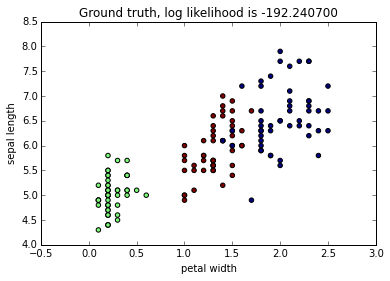

In [26]:
iris = datasets.load_iris()
# Leave just two features of the Iris dataset to simplify plotting and debugging.
X = iris.data[:, [3, 0]]
y = iris.target

# Plot ground truth and its log-likelihood.
y = np.choose(y, [1, 2, 0]).astype(np.float)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('Ground truth, log likelihood is %f' % log_likelihood_from_labels(X, y))

# K-Means from sklearn

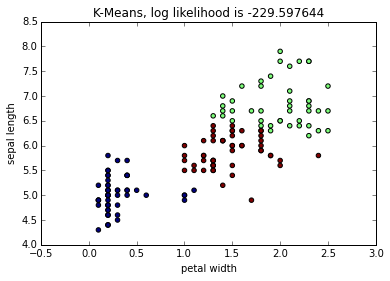

In [6]:
# Reproducibility.
np.random.seed(0)
est = sklearn.cluster.KMeans(n_clusters=3)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('K-Means, log likelihood is %f' % log_likelihood_from_labels(X, y))

# Example implementation of random clusterer.

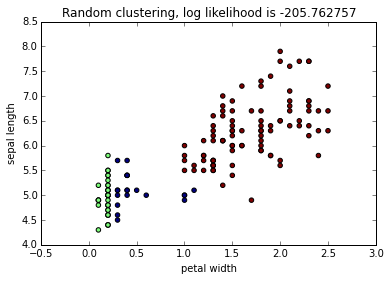

In [27]:
# Reproducibility.
np.random.seed(2)
est = clustering.Random(n_clusters=3)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('Random clustering, log likelihood is %f' % log_likelihood_from_labels(X, y))

# EM algorithm

Initialization 1 has no convergence
Initialization 3 has no convergence
Initialization 5 has no convergence
Initialization 8 has no convergence


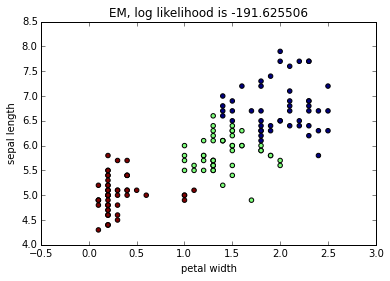

In [29]:
np.random.seed(0)
est = clustering.Clustering(algorithm="EM", n_clusters=3, max_iter=100, n_init=10)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

# Convergence

[-396.17830970225879, -396.17830970225879, -264.09016726824348, -257.96308538391759, -253.79918327786129, -250.73531312086917, -247.14976720877863, -240.91969174064087, -226.60257994905132, -202.79043801346143, -198.29590309316546, -197.70676733547461, -197.44461707242584, -197.25218982836867, -197.07620886546749, -196.88710755155736, -196.6650853258038, -196.39610781295013, -196.07153677045179, -195.690337960194, -195.2612794146898, -194.8023078329926, -194.33704508889321, -193.89030518524109, -193.48350726556546, -193.13065382250505, -192.83594573893976, -192.59483723196757, -192.39864293604668, -192.23900245542376, -192.10948243213073, -192.00513871633757, -191.92176830633235, -191.85557987947629, -191.80320368255954, -191.76178427794926, -191.72901240372897, -191.70307718120512, -191.68257477074724, -191.66641163984386, -191.65372380152348, -191.64381776598361, -191.63613035835851, -191.63020186020313, -191.62565739760333, -191.62219301911625, -191.61956438169921, -191.617577012444

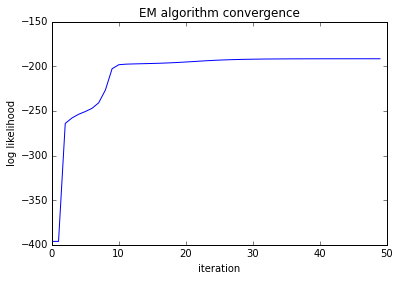

In [77]:
print est.logs['log_likelihood']
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('EM algorithm convergence')

In [80]:
%matplotlib qt
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
ax = fig.add_subplot(111)
scat = ax.scatter(X[:, 0], X[:, 1], c=est.logs['labels'][0])
mu_labels = np.unique(est.logs['labels'][0])
mu_scat = ax.scatter(est.logs['mu'][0][:, 0], est.logs['mu'][0][:, 1], c=mu_labels, marker='x', s=50)
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')

def update_line(num):
    scat.set_array(est.logs['labels'][num])
    ll = log_likelihood(X, est.logs['w'][num], est.logs['mu'][num], est.logs['sigma'][num])
    mu_scat.set_offsets(est.logs['mu'][num])
#     mu_scat.set_data([], [])
    
    ax.set_title('EM, iter %d, log likelihood is %f' % (num, ll))
    return scat,# mu_scat

line_ani = animation.FuncAnimation(fig, update_line, len(est.logs['labels']),
    interval=1000, blit=False)


plt.show()

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

np.random.seed(3)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_3': sklearn.cluster.KMeans(n_clusters=3),
              'k_means_8': sklearn.cluster.KMeans(n_clusters=8),
              'em_iris_3': clustering.Clustering(algorithm="EM", n_clusters=3, n_init=100),
              'rand_iris_3': clustering.Random(n_clusters=3),}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    if hasattr(est, 'covars_'):
        ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
    else:
        ll = log_likelihood_from_labels(X, labels)
    ax.set_title('%s, %f' % (name, ll))
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground truth, %f' % log_likelihood_from_labels(X, y))
plt.show()

## SoftKMeans


Initialization 0 has no convergence


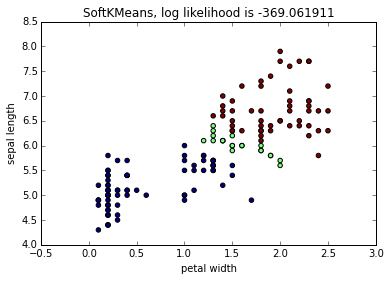

In [22]:
np.random.seed(0)
est = clustering.Clustering(algorithm="SoftKMeans", n_clusters=3, max_iter=100, n_init=10)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)

### Convergence

[-425.8485255095996, -425.8485255095996, -369.98438837241849, -369.40340333679296, -369.21839050610708, -369.14216764769378, -369.10680113042127, -369.0889810166824, -369.0793603383438, -369.07380342009617, -369.07035036376334, -369.06802512127206, -369.06632338859708, -369.06497719279014, -369.06384095081336, -369.0628340947938]


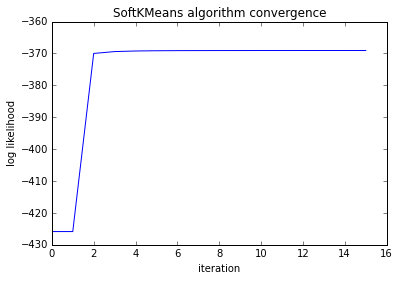

In [15]:
print est.logs['log_likelihood']
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('SoftKMeans algorithm convergence')

In [16]:
%matplotlib qt
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
ax = fig.add_subplot(111)
scat = ax.scatter(X[:, 0], X[:, 1], c=est.logs['labels'][0])
mu_labels = np.unique(est.logs['labels'][0])
mu_scat = ax.scatter(est.logs['mu'][0][:, 0], est.logs['mu'][0][:, 1], c=mu_labels, marker='x', s=50)
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')

def update_line(num):
    scat.set_array(est.logs['labels'][num])
    ll = log_likelihood(X, est.logs['w'][num], est.logs['mu'][num], est.logs['sigma'][num])
    mu_scat.set_offsets(est.logs['mu'][num])
#     mu_scat.set_data([], [])
    
    ax.set_title('EM, iter %d, log likelihood is %f' % (num, ll))
    return scat,# mu_scat

line_ani = animation.FuncAnimation(fig, update_line, len(est.logs['labels']),
    interval=1000, blit=False)


plt.show()

## KMeans

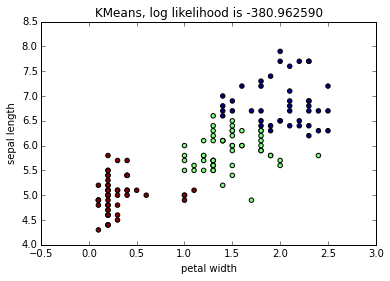

In [47]:
np.random.seed(0)
est = clustering.Clustering(algorithm = "KMeans", n_clusters=3, max_iter=100, n_init=10)
est.fit(X)
if est.convergence > 0:
    y = est.labels_

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('petal width')
    plt.ylabel('sepal length')
    ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
    plt.title('KMeans, log likelihood is %f' % ll)

### Convergence

[-396.17830970225879, -396.17830970225879, -379.13408320023098, -380.8527033859923, -381.19590936291581, -380.96258956194231]


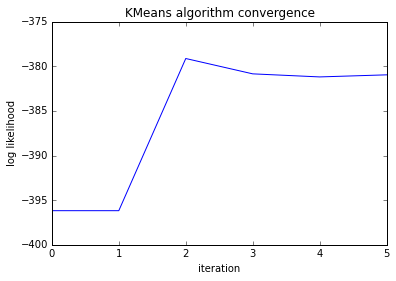

In [48]:
print est.logs['log_likelihood']
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('KMeans algorithm convergence')

I suppose that it decrease due to numerical issues :)

In [49]:
%matplotlib qt
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
ax = fig.add_subplot(111)
scat = ax.scatter(X[:, 0], X[:, 1], c=est.logs['labels'][0])
mu_labels = np.unique(est.logs['labels'][0])
mu_scat = ax.scatter(est.logs['mu'][0][:, 0], est.logs['mu'][0][:, 1], c=mu_labels, marker='x', s=50)
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')

def update_line(num):
    scat.set_array(est.logs['labels'][num])
    ll = log_likelihood(X, est.logs['w'][num], est.logs['mu'][num], est.logs['sigma'][num])
    mu_scat.set_offsets(est.logs['mu'][num])
#     mu_scat.set_data([], [])
    
    ax.set_title('EM, iter %d, log likelihood is %f' % (num, ll))
    return scat,# mu_scat

line_ani = animation.FuncAnimation(fig, update_line, len(est.logs['labels']),
    interval=1000, blit=False)


plt.show()

# Task 6, 7

Generate two datasets on which

** (a) All the methods work equally good - spherical distributed data **

#### Data Generation

In [116]:
np.random.seed(0)

sizes = [150, 150, 150]
mu = [[1,5], [4,0], [6,6]] 
y_a = []
X_a = [[],[]]

for cluster in range (len(sizes)):
    x, y = np.random.multivariate_normal(mu[cluster], np.eye(2), sizes[cluster]).T
    X_a[0].extend(x)
    X_a[1].extend(y)
    y_a.extend([cluster] * sizes[cluster])
X_a = np.array(X_a).T
y_a = np.array(y_a)


#### Plot


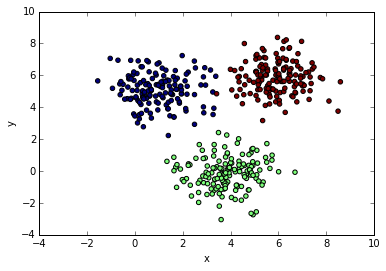

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_a[:, 0], X_a[:, 1], c=y_a)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### EM

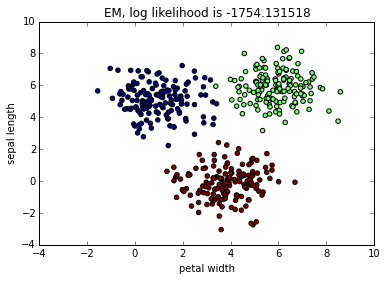

In [119]:
np.random.seed(0)
est = clustering.Clustering(algorithm="EM", n_clusters=3, max_iter=100, n_init=2)
est.fit(X_a)
y = est.labels_

plt.scatter(X_a[:, 0], X_a[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X_a, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

#### KMeans

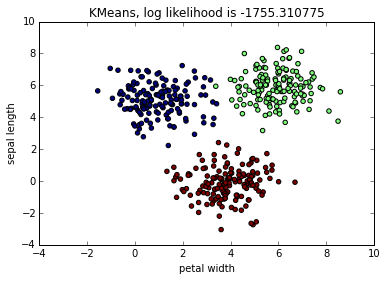

In [120]:
np.random.seed(0)
est = clustering.Clustering(algorithm = "KMeans", n_clusters=3, max_iter=100, n_init=10)
est.fit(X_a)
if est.convergence > 0:
    y = est.labels_

    plt.scatter(X_a[:, 0], X_a[:, 1], c=y)
    plt.xlabel('petal width')
    plt.ylabel('sepal length')
    ll = log_likelihood(X_a, est.w_, est.cluster_centers_, est.covars_)
    plt.title('KMeans, log likelihood is %f' % ll)

#### SoftKMeans

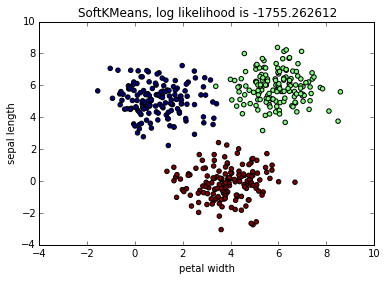

In [121]:
np.random.seed(0)
est = clustering.Clustering(algorithm = "SoftKMeans",n_clusters=3, max_iter=100, n_init=2)
est.fit(X_a)
y = est.labels_

plt.scatter(X_a[:, 0], X_a[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X_a, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)

** (b) Full EM-algorithm works much better than the other - unbalanced :)**

#### Data Generation

In [122]:
np.random.seed(0)

sizes = [20, 100, 500]
mu = [[1,5], [4,0], [6,6]] 
y_b = []
X_b = [[],[]]

for cluster in range (len(sizes)):
    x, y = np.random.multivariate_normal(mu[cluster], np.eye(2), sizes[cluster]).T
    X_b[0].extend(x)
    X_b[1].extend(y)
    y_b.extend([cluster] * sizes[cluster])
X_b = np.array(X_b).T
y_b = np.array(y_b)


#### Plot

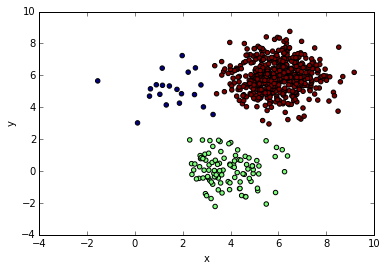

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_b[:, 0], X_b[:, 1], c=y_b)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### KMeans

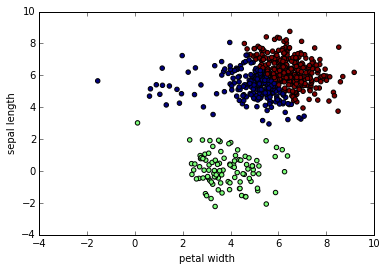

In [124]:
# Reproducibility.
np.random.seed(0)
est = sklearn.cluster.KMeans(n_clusters=3)
est.fit(X_b)
y = est.labels_

plt.scatter(X_b[:, 0], X_b[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')

The upper clusters were suggested as balanced because $w_k = \frac{1}{K}$, as the consequence - Kmeans has broken

#### Soft KMeans

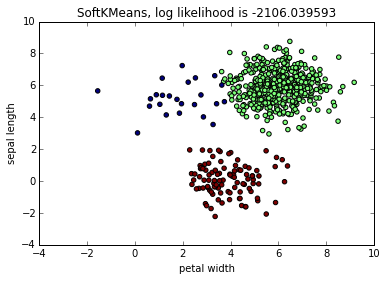

In [125]:
np.random.seed(0)
est = clustering.Clustering(algorithm="SoftKMeans", n_clusters=3, max_iter=100, n_init=6)
est.fit(X_b)
y = est.labels_

plt.scatter(X_b[:, 0], X_b[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X_a, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)

** EM **


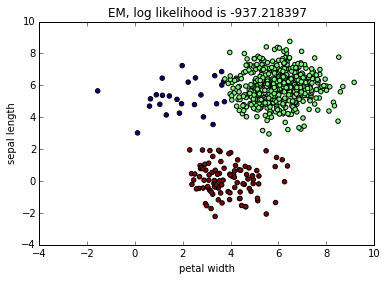

In [109]:
np.random.seed(0)
est = clustering.Clustering(algorithm = "EM", n_clusters=3, max_iter=100, n_init=2)
est.fit(X_b)
y = est.labels_

plt.scatter(X_b[:, 0], X_b[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

We can see, that all algorithms works good.